In [46]:
import pandas as pd
import numpy as np
import re
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse

In [54]:
df = pd.read_csv('../data/all_data.csv')

In [55]:
df_non_obf = df[df['is_obf'] == 0]
df_obf = df[df['is_obf'] == 1]
results = []

## Non-obfuscated data

In [76]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(3,3))
raw_counts = count_vect.fit_transform(df_non_obf['payload'])

# Display features
features = count_vect.get_feature_names()
print('Number of features: ' + str(len(features)))

Number of features: 37275


In [77]:
# Append metadata to sparse matrix that will be used to train the classifier
num_feats = df_non_obf[['length']].values
non_obf_data = sparse.hstack((raw_counts, num_feats))
non_obf_labels = df_non_obf['label'].values

In [78]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(non_obf_data, non_obf_labels, test_size=0.3, random_state=0)

In [79]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='log', penalty='none', random_state=0).fit(train_data, train_labels)

In [80]:
# Run inference on the test data and predict labels for each data point in the test data
predicted_labels = classifier.predict(test_data)

# Calculate and print the following metrics: precision, recall, f1-measure, and accuracy
from sklearn import metrics
precision_non_obf = metrics.precision_score(test_labels, predicted_labels)
recall_non_obf = metrics.recall_score(test_labels, predicted_labels)
f1measure_non_obf = metrics.f1_score(test_labels, predicted_labels)
accuracy_non_obf = metrics.accuracy_score(test_labels, predicted_labels)

print(' precision = ' + str(precision_non_obf))
print('    recall = ' + str(recall_non_obf))
print('F1-measure = ' + str(f1measure_non_obf))
print('  accuracy = ' + str(accuracy_non_obf))
print('\n')

 precision = 0.952
    recall = 0.9305598999061621
F1-measure = 0.9411578614362542
  accuracy = 0.958881397148226




## Obfuscated data

In [82]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(3,3))
raw_counts = count_vect.fit_transform(df_obf['payload'])

# Display features
features = count_vect.get_feature_names()
print('Number of features: ' + str(len(features)))

Number of features: 2532857


In [83]:
# Append metadata to sparse matrix that will be used to train the classifier
num_feats = df_obf[['length']].values
obf_data = sparse.hstack((raw_counts, num_feats))
obf_labels = df_obf['label'].values

In [84]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(obf_data, obf_labels, test_size=0.3, random_state=0)

In [85]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='log', penalty='none', random_state=0).fit(train_data, train_labels)

In [86]:
# Run inference on the test data and predict labels for each data point in the test data
predicted_labels = classifier.predict(test_data)

# Calculate and print the following metrics: precision, recall, f1-measure, and accuracy
from sklearn import metrics
precision_obf = metrics.precision_score(test_labels, predicted_labels)
recall_obf = metrics.recall_score(test_labels, predicted_labels)
f1measure_obf = metrics.f1_score(test_labels, predicted_labels)
accuracy_obf = metrics.accuracy_score(test_labels, predicted_labels)

print(' precision = ' + str(precision_obf))
print('    recall = ' + str(recall_obf))
print('F1-measure = ' + str(f1measure_obf))
print('  accuracy = ' + str(accuracy_obf))
print('\n')

 precision = 0.353963684676705
    recall = 1.0
F1-measure = 0.5228555074004416
  accuracy = 0.35503481817176963




## All data

In [87]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(3,3))
raw_counts = count_vect.fit_transform(df['payload'])

# Display features
features = count_vect.get_feature_names()
print('Number of features: ' + str(len(features)))

Number of features: 2551635


In [88]:
# Append metadata to sparse matrix that will be used to train the classifier
num_feats = df[['length']].values
all_data = sparse.hstack((raw_counts, num_feats))
all_labels = df['label'].values

In [89]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.3, random_state=0)

In [90]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='log', penalty='none', random_state=0).fit(train_data, train_labels)

In [91]:
# Run inference on the test data and predict labels for each data point in the test data
predicted_labels = classifier.predict(test_data)

# Calculate and print the following metrics: precision, recall, f1-measure, and accuracy
from sklearn import metrics
precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1measure = metrics.f1_score(test_labels, predicted_labels)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)

print(' precision = ' + str(precision))
print('    recall = ' + str(recall))
print('F1-measure = ' + str(f1measure))
print('  accuracy = ' + str(accuracy))
print('\n')

 precision = 0.868437697659709
    recall = 0.8359208523592085
F1-measure = 0.8518690863967737
  accuracy = 0.8944401459047198




In [92]:
g1 = 'Non-obfuscated data'
g2 = 'Obfuscated data'
g3 = 'All data'
c1 = 'Precision'
c2 = 'Recall'
c3 = 'F1-measure'
c4 = 'Accuracy'
results = [[g1, c1, precision_non_obf], [g1, c2, recall_non_obf], [g1, c3, f1measure_non_obf], [g1, c4, accuracy_non_obf],
           [g2, c1, precision_obf], [g2, c2, recall_obf], [g2, c3, f1measure_obf], [g2, c4, accuracy_obf],
           [g3, c1, precision], [g3, c2, recall], [g3, c3, f1measure], [g3, c4, accuracy]]

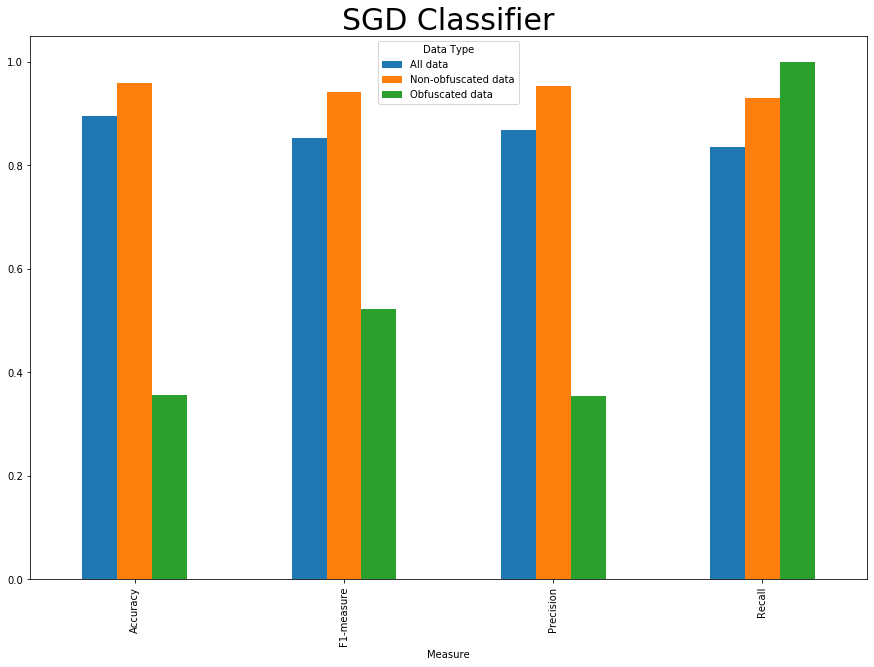

In [113]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

plot_df= pd.DataFrame(results,columns=['Data Type','Measure','val'])

plot_df.pivot('Measure','Data Type','val').plot(kind='bar')
plt.title('SGD Classifier', fontdict = {'fontsize' : 30})

plt.show()
